In [ ]:
!pip install wget
!pip install transformers

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=fc9a692293ea9ccb2bc64773bcdef44854186efc654040d0ef07e63cd9459c4f
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
!pip install tensorflow==2.16.1 tf-keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 16.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")

import wget
wget.download("https://raw.githubusercontent.com/yogawicaksana/helper_prabowo/main/helper_prabowo_ml.py",
              out="helper_prabowo_ml.py")
from helper_prabowo_ml import clean_html, remove_links, remove_special_characters, removeStopWords
from helper_prabowo_ml import remove_, remove_digits, lower, email_address, non_ascii, punct, hashtags

from wordcloud import WordCloud

import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModel

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
train_df = pd.read_csv('Data_Train.csv', encoding='latin-1') # Try reading with 'latin-1' encoding
train_df

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ...",1
4,"In global markets, gold prices edged up today ...",3
...,...,...
7623,"Karnataka has been a Congress bastion, but it ...",0
7624,"The film, which also features Janhvi Kapoor, w...",2
7625,The database has been created after bringing t...,1
7626,"The state, which has had an uneasy relationshi...",0


In [3]:
test_df = pd.read_csv('Data_Test.csv', encoding='latin-1')
test_df

,STORY
0,2019 will see gadgets like gaming smartphones ...
1,It has also unleashed a wave of changes in the...
2,It can be confusing to pick the right smartpho...
3,The mobile application is integrated with a da...
4,We have rounded up some of the gadgets that sh...
...,...
2743,"According to researchers, fraud in the mobile ..."
2744,The iPhone XS and XS Max share the Apple A12 c...
2745,"On the photography front, the Note 5 Pro featu..."
2746,UDAY mandated that discoms bring the gap betwe...


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7628 entries, 0 to 7627
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   STORY    7628 non-null   object
 1   SECTION  7628 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.3+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STORY   2748 non-null   object
dtypes: object(1)
memory usage: 21.6+ KB


In [6]:
train_df.shape

(7628, 2)

In [7]:
test_df.shape

(2748, 1)

In [8]:
train_df.duplicated().sum()

77

In [9]:
test_df.duplicated().sum()

11

In [10]:
train_df = train_df.drop_duplicates()
train_df.shape

(7551, 2)

In [11]:
test_df = test_df.drop_duplicates()
test_df.shape

(2737, 1)

In [12]:
train_df.isna().sum()

STORY      0
SECTION    0
dtype: int64

In [13]:
test_df.isna().sum()

STORY    0
dtype: int64

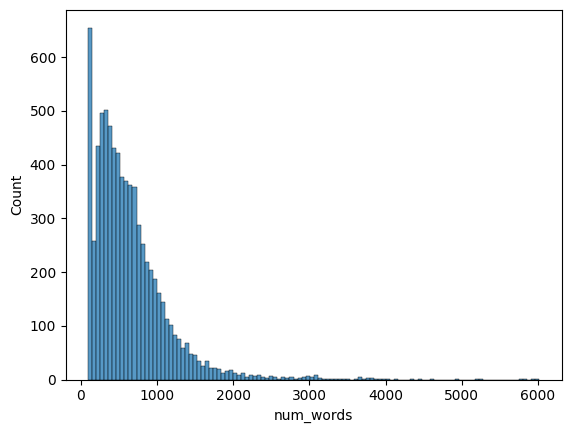

In [14]:
train_df['num_words'] = train_df.STORY.apply(len)
sns.histplot(train_df.num_words);

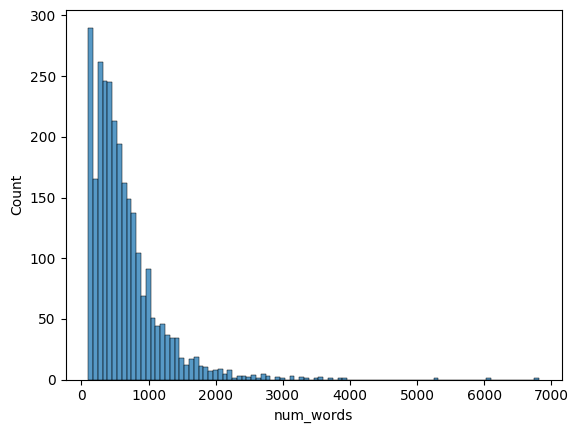

In [15]:
test_df['num_words'] = test_df.STORY.apply(len)
sns.histplot(test_df.num_words);

In [16]:
train_df.describe()

,SECTION,num_words
count,7551.000000,7551.000000
mean,1.358496,653.719375
std,0.999904,522.283468
min,0.000000,100.000000
25%,1.000000,316.000000
50%,1.000000,537.000000
75%,2.000000,836.000000
max,3.000000,6015.000000


In [17]:
test_df.describe()

,num_words
count,2737.000000
mean,640.393862
std,519.243541
min,100.000000
25%,305.000000
50%,512.000000
75%,809.000000
max,6820.000000


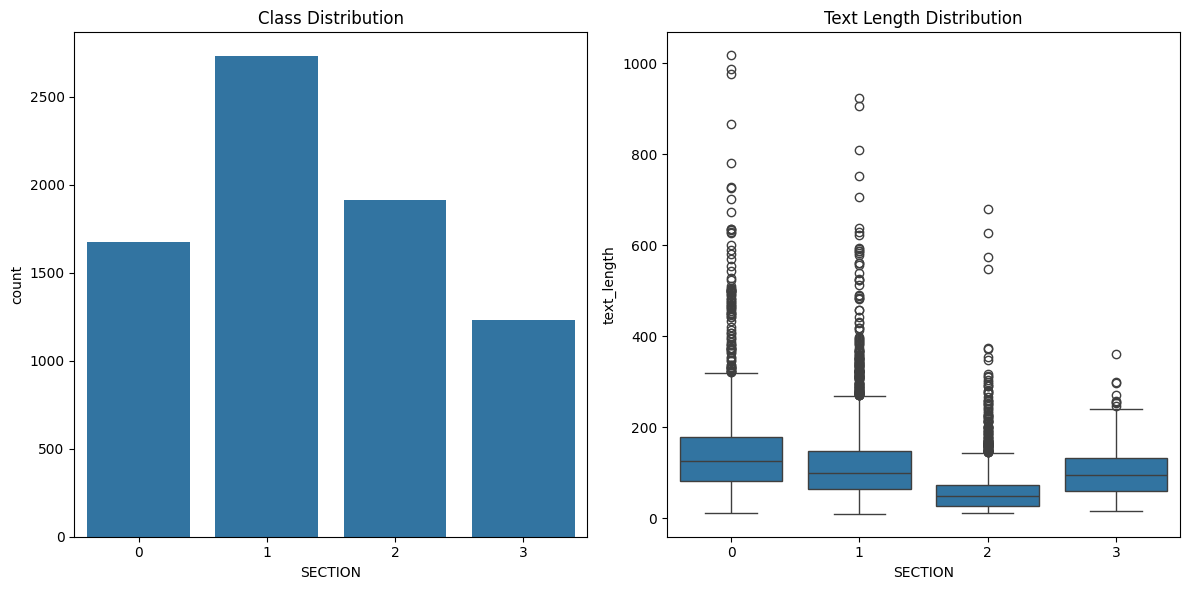

In [18]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.countplot(x='SECTION', data=train_df)
plt.title('Class Distribution')

plt.subplot(1, 2, 2)
train_df['text_length'] = train_df['STORY'].apply(lambda x: len(x.split()))
sns.boxplot(x='SECTION', y='text_length', data=train_df)
plt.title('Text Length Distribution')

plt.tight_layout()
plt.show()

In [19]:
q1 = train_df['text_length'].quantile(0.25)
q3 = train_df['text_length'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = train_df[(train_df['text_length'] < lower_bound) | (train_df['text_length'] > upper_bound)]

print(f'Number of outliers: {len(outliers)}')

train_df = train_df[~((train_df['text_length'] < lower_bound) | (train_df['text_length'] > upper_bound))]

Number of outliers: 330


In [20]:
print(f'Number of articles after removing outliers: {len(train_df)}')

Number of articles after removing outliers: 7221


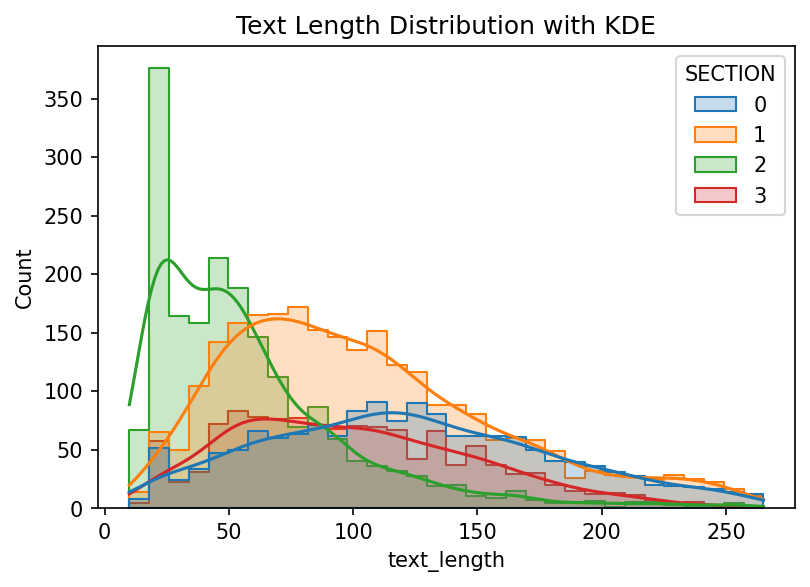

In [21]:
plt.figure(figsize=(6, 4), dpi=150)

sns.histplot(data=train_df, x='text_length', hue='SECTION', kde=True, element='step', palette = sns.color_palette("tab10", 4))
plt.title('Text Length Distribution with KDE')

plt.show()

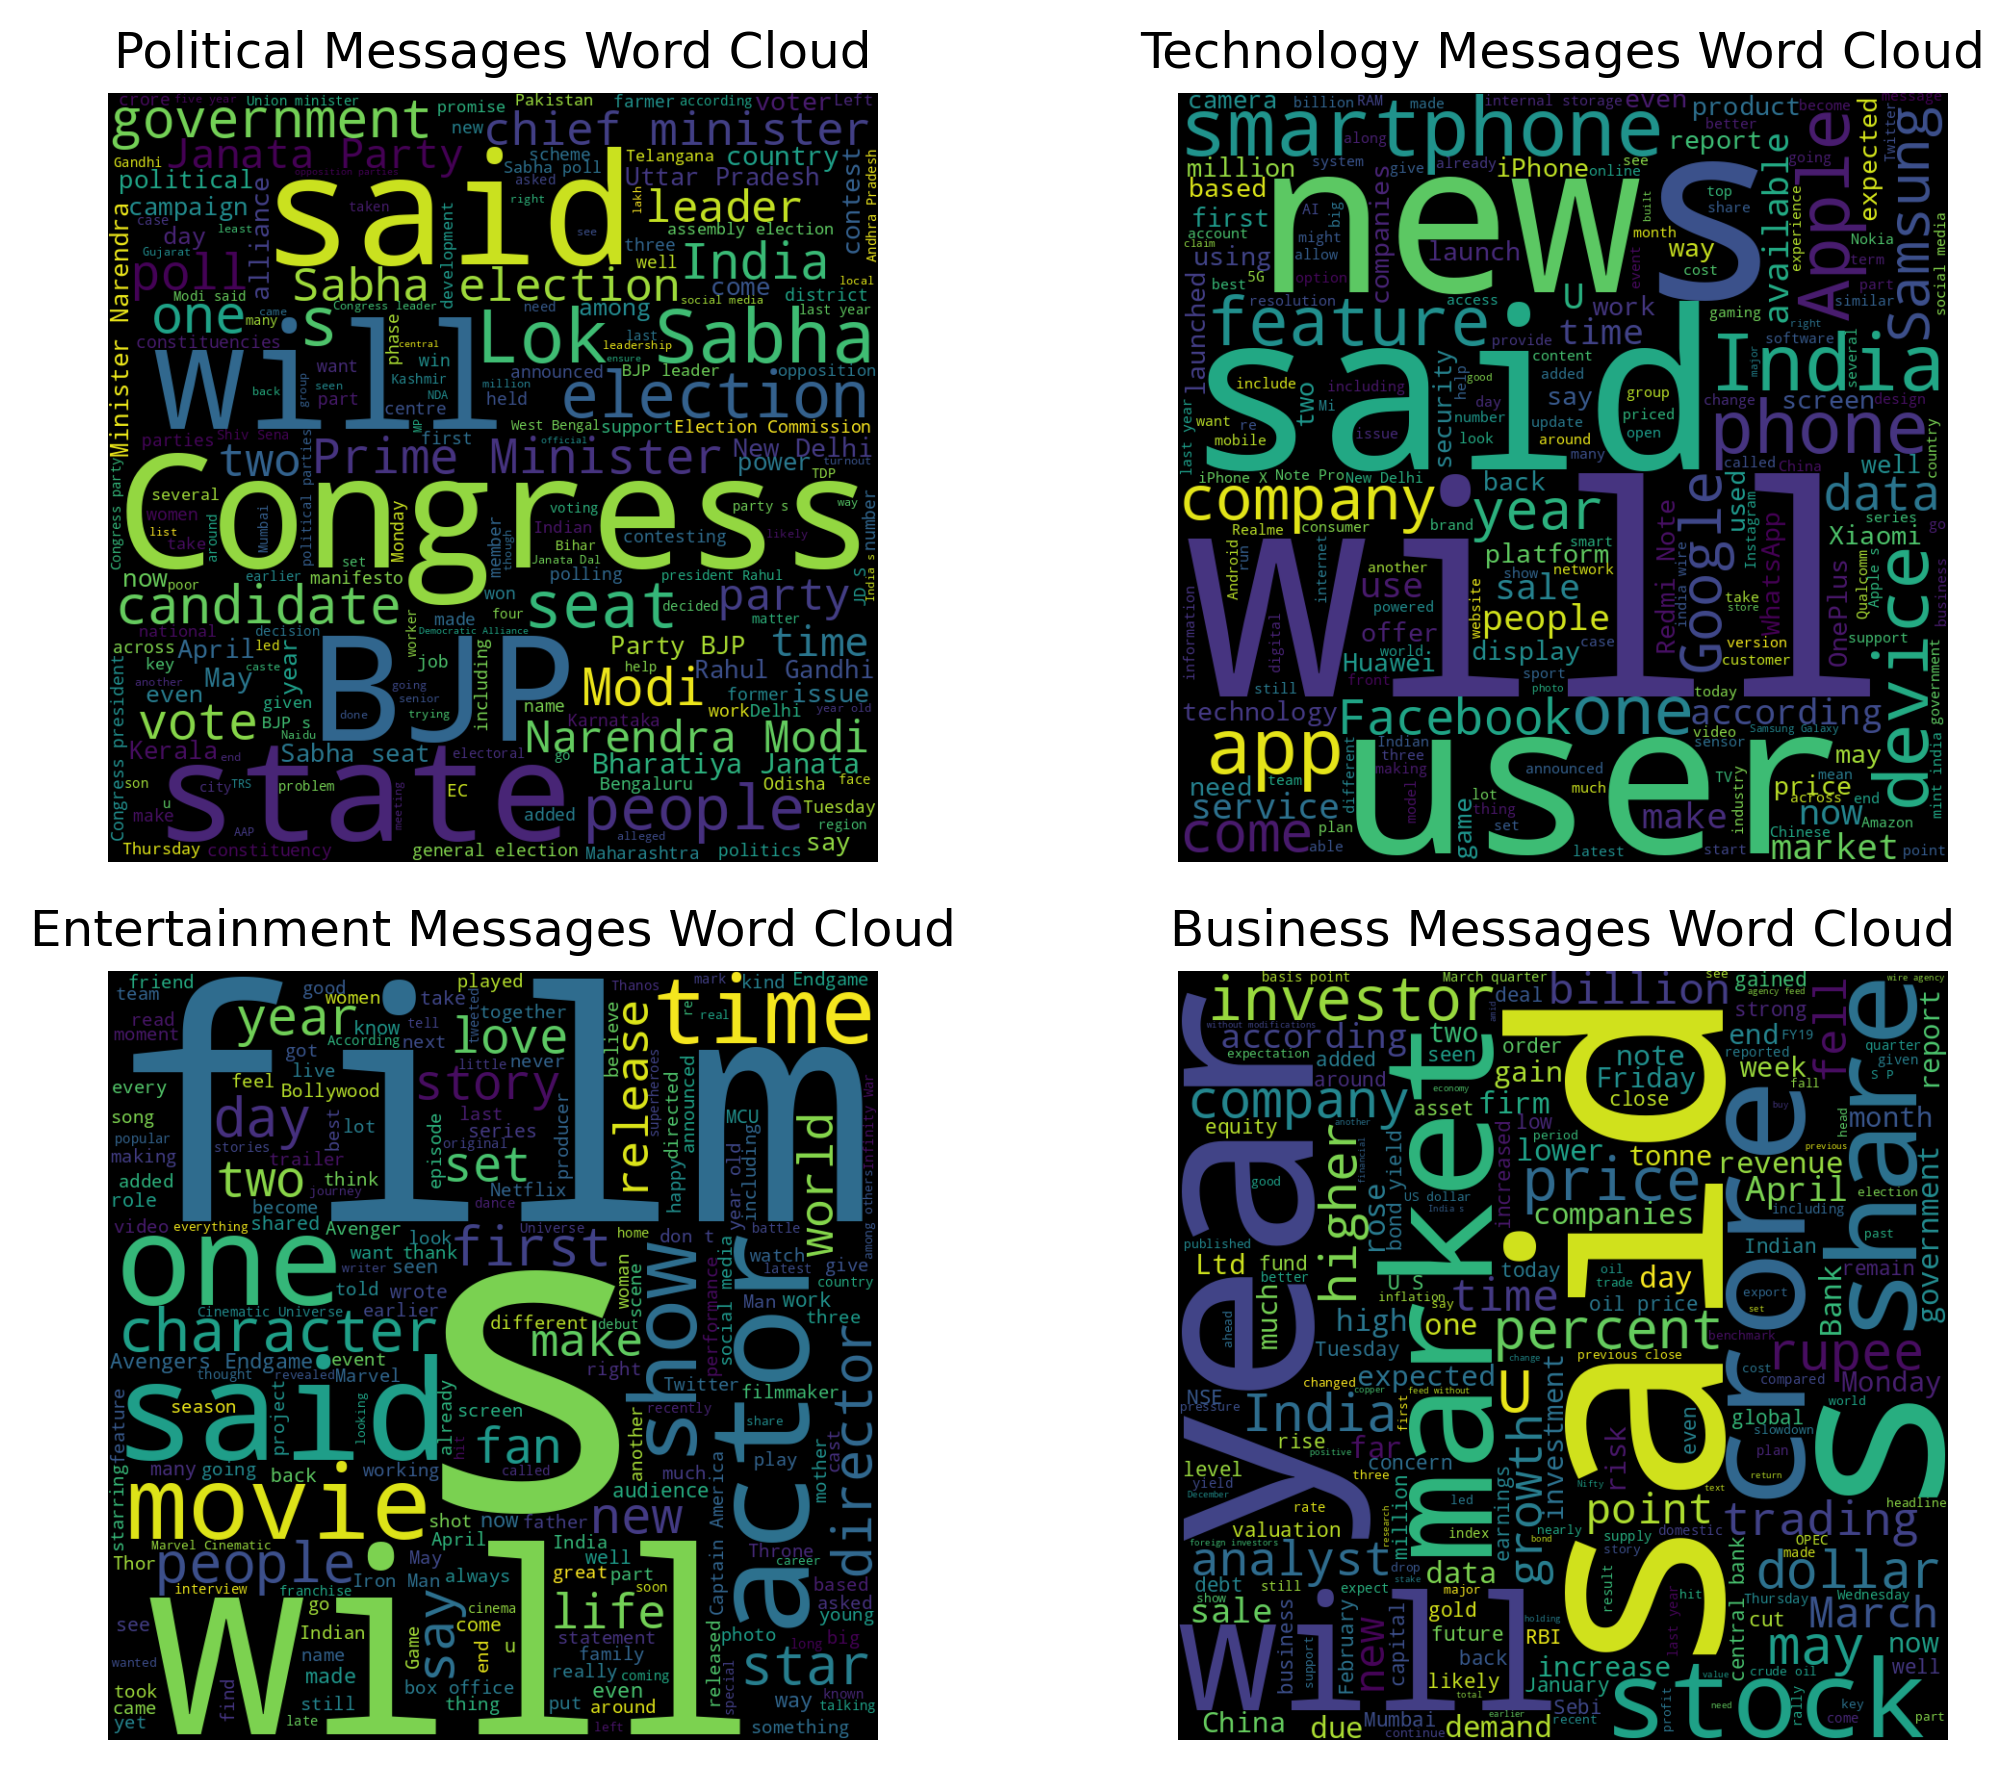

In [22]:
political_text = " ".join(train_df[train_df['SECTION'] == 0]['STORY'])
technology_text = " ".join(train_df[train_df['SECTION'] == 1]['STORY'])
entertainment_text = " ".join(train_df[train_df['SECTION'] == 2]['STORY'])
business_text = " ".join(train_df[train_df['SECTION'] == 3]['STORY'])

political_wordcloud = WordCloud(width=800, height=800).generate(political_text)
technology_wordcloud = WordCloud(width=800, height=800).generate(technology_text)
entertainment_wordcloud = WordCloud(width=800, height=800).generate(entertainment_text)
business_wordcloud = WordCloud(width=800, height=800).generate(business_text)

political_image = political_wordcloud.to_array()
technology_image = technology_wordcloud.to_array()
entertainment_image = entertainment_wordcloud.to_array()
business_image = business_wordcloud.to_array()

plt.figure(figsize=(8, 6), dpi=300)

plt.subplot(2, 2, 1)
plt.imshow(political_image, interpolation='bilinear')
plt.title('Political Messages Word Cloud')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(technology_image, interpolation='bilinear')
plt.title('Technology Messages Word Cloud')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(entertainment_image, interpolation='bilinear')
plt.title('Entertainment Messages Word Cloud')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(business_image, interpolation='bilinear')
plt.title('Business Messages Word Cloud')
plt.axis('off')
plt.tight_layout()
plt.show()

In [23]:
def text_preprocess(data,col):
    data[col] = data[col].apply(func=clean_html)
    data[col] = data[col].apply(func=remove_)
    data[col] = data[col].apply(func=removeStopWords)
    data[col] = data[col].apply(func=remove_digits)
    data[col] = data[col].apply(func=remove_links)
    data[col] = data[col].apply(func=remove_special_characters)
    data[col] = data[col].apply(func=punct)
    data[col] = data[col].apply(func=non_ascii)
    data[col] = data[col].apply(func=email_address)
    data[col] = data[col].apply(func=lower)
    return data

In [24]:
preprocessed_train_df = text_preprocess(train_df,'STORY')
preprocessed_train_df.head()

,STORY,SECTION,num_words,text_length
0,but painful huge reversal fee income unheard a...,3,843,148
1,how formidable opposition alliance among congr...,0,129,17
2,most asian currencies trading lower today sout...,3,386,58
3,if want answer question click answer after cli...,1,587,103
4,in global markets gold prices edged today disa...,3,299,46


In [25]:
preprocessed_test_df = text_preprocess(test_df,'STORY')
preprocessed_test_df.head()

,STORY,num_words
0,see gadgets gaming smartphones wearable medica...,1558
1,also unleashed wave changes mcu make sure futu...,250
2,confusing pick right smartphone yourself segre...,1602
3,the mobile application integrated dashboard co...,813
4,we rounded gadgets showed left indelible mark ...,1263


In [26]:
preprocessed_train_df.drop(columns=['num_words', 'text_length'], axis=1, inplace=True)
preprocessed_train_df

,STORY,SECTION
0,but painful huge reversal fee income unheard a...,3
1,how formidable opposition alliance among congr...,0
2,most asian currencies trading lower today sout...,3
3,if want answer question click answer after cli...,1
4,in global markets gold prices edged today disa...,3
...,...,...
7622,in terms optics back redmi note boasts mpmp ai...,1
7623,karnataka congress bastion also gave bjp first...,0
7624,the film also features janhvi kapoor revolve a...,2
7625,the database created bringing together crimina...,1


In [27]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = TFAutoModel.from_pretrained("bert-base-uncased")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [28]:
train_df = preprocessed_train_df
test_df = preprocessed_test_df

x_train, x_test, y_train, y_test = train_test_split(train_df.STORY, train_df.SECTION, test_size=0.2, random_state=42)

In [33]:
def extract_transformer_features(texts, max_length=128, batch_size=16):

    features = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i: i + batch_size]
        encodings = tokenizer(
            text=batch_texts,
            max_length=max_length,
            padding=True,
            truncation=True,
            return_tensors="tf",
            return_attention_mask=True,
            return_token_type_ids=False
        )
        outputs = model(encodings)
        batch_features = outputs.last_hidden_state[:, 0, :].numpy()
        features.append(batch_features)
    return np.concatenate(features, axis=0)

X_train_transformer = extract_transformer_features(x_train.tolist())
X_test_transformer = extract_transformer_features(x_test.tolist())

X_test_new = extract_transformer_features(test_df['STORY'].tolist())

In [34]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(x_train).toarray()
X_test_tfidf = vectorizer.transform(x_test).toarray()

X_test_new_tfidf = vectorizer.transform(test_df['STORY']).toarray()

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_transformer_scaled = scaler.fit_transform(X_train_transformer)
X_test_transformer_scaled = scaler.transform(X_test_transformer)

X_test_new_scaled = scaler.transform(X_test_new)


X_train_combined = np.hstack((X_train_transformer_scaled, X_train_tfidf))
X_test_combined = np.hstack((X_test_transformer_scaled, X_test_tfidf))

X_test_new_combined = np.hstack((X_test_new_scaled, X_test_new_tfidf))

In [36]:
model = MultinomialNB()
model.fit(X_train_combined, y_train)

y_pred = model.predict(X_test_combined)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9730
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       300
           1       0.97      0.98      0.98       500
           2       0.96      0.99      0.97       392
           3       0.98      0.98      0.98       253

    accuracy                           0.97      1445
   macro avg       0.97      0.97      0.97      1445
weighted avg       0.97      0.97      0.97      1445



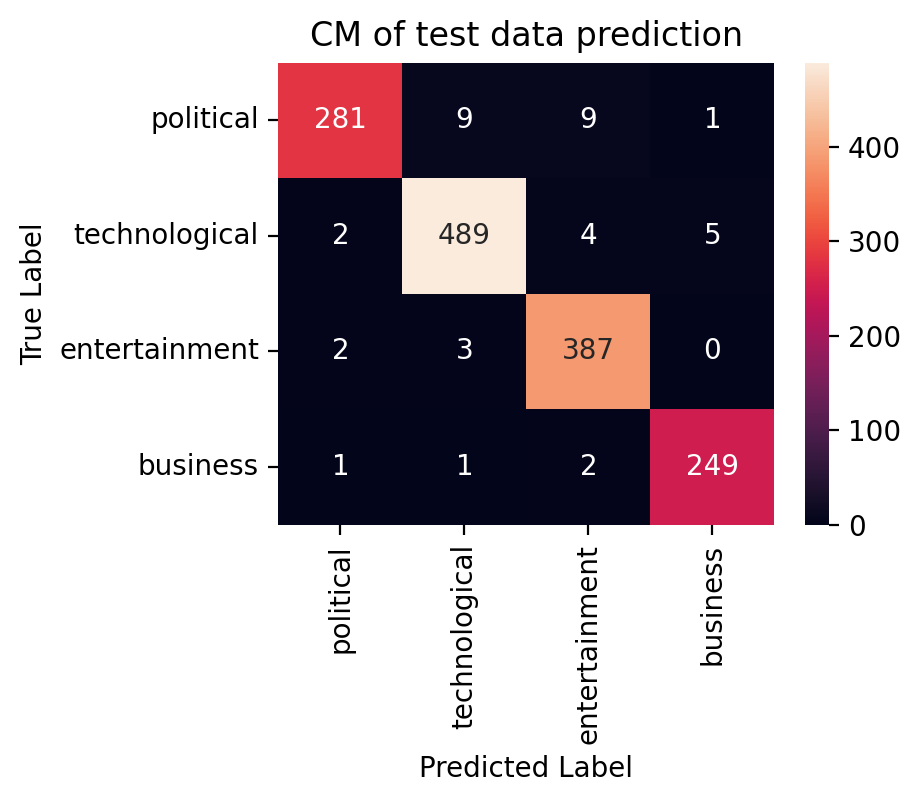

In [37]:
conf_matrix = confusion_matrix(y_test, y_pred)
labels =['political', 'technological', 'entertainment', 'business']
plt.figure(figsize=(4, 3), dpi=200)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.title('CM of test data prediction')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [38]:
x_test_pred = model.predict(X_test_new_combined)
test_df['PREDICTED_SECTION'] = x_test_pred

print(test_df[['STORY', 'PREDICTED_SECTION']])

                                                  STORY  PREDICTED_SECTION
0     see gadgets gaming smartphones wearable medica...                  1
1     also unleashed wave changes mcu make sure futu...                  2
2     confusing pick right smartphone yourself segre...                  1
3     the mobile application integrated dashboard co...                  0
4     we rounded gadgets showed left indelible mark ...                  1
...                                                 ...                ...
2743  according researchers fraud mobile channel gro...                  1
2744  the iphone xs xs max share apple a chipset alo...                  1
2745  on photography front note pro features mp mp d...                  1
2746  uday mandated discoms bring gap average revenu...                  3
2747  ripple also helps bank customers send money pe...                  1

[2737 rows x 2 columns]
